<h1 align=center style="color: #005496; font-size: 4.2em;">University of Trento</h1>
<h2 align=center>Assignment on Neural Networks</h2>
<h3 align=center>Machine Learning Course, Prof. Andrea Passerini - A.Y. 2019/2020</h3>
<h4 align=center>Giuseppe Saccardi</h4>

***
This assignment consists in solving a classification task using TensorFlow over the OCR dataset. The dataset is already split into training and test sets, moreover the data are contained in the folder named ***ocr*** .

My objective is to train a deep neural network withat least 3 convolutional layers on the training set and predict the labels on the test set. To pass the assignment and move to the oral examination, the implemented network has to classify the examples in the test set with higher accuracy than the reference base line for the dataset.

Additionally,model selection (optimize at least one hyperparameter) is required to pass the assignment. To this purpose, it is necessary to test my algorithm over a validation set.

## The Dataset
The data we had consist of two pairs of files, each of them containing a set
of data (16x8 bitmap images representing handwritten characters) and a set of
targets. The first pair contains 41721 examples for training, whereas the other
one 10431 instances for testing

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Loading dataset
data_train = np.loadtxt("ocr/train-data.csv",delimiter = ",")
data_test = np.loadtxt("ocr/test-data.csv",delimiter = ",")
targets_train = np.array(pd.read_csv("ocr/train-target.csv",sep='\t',header = None))
targets_test = np.array(pd.read_csv("ocr/test-target.csv",sep='\t', header = None))

In [2]:
data_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0.])

In [3]:
data_test[0]

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0.])

## Deep architectures

<p>
We are now going to define a deep neural network.  Moreover we are going to use three convolutional layers alternated with 2 max pool layers, followed by a fully connected layer regularized with dropout, and finally we'll get predictions using again a softmax layer. Here you see a schematic view of the architecture (bottom up). 
</p>

<img src="arch.png" style="width: 350px" />

***

### Fully Connected Layer
In a fully connected layer each neuron is connected with each neuron of the previous layer. This is the most straightforward way to implement a Neural Network.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1547672259/3_qwv5gr.png" width="750px" />

***


### Convolutional layer

Convolutional Neural Networks are based on a method for extracting meaningfull features from images, exploiting locality and parameter sharing between "close" pixels. In particular, a convolutional layer takes as input a matrix and divides it into smaller "patches". It outputs a number of features for each patch. The resulting tensor will be similar to the one in the following picture.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png" width="400px" />
<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif" width="250px" />

Applying a convolution reduces the height and the width of the 
input image. This effect is not always desirable. 
In order to avoid it, we must add some empty data around our images.
This data (usually containing zeros) is called *padding*



<img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif" width="400px" />


***

### Max pool layer

The max pool layer is a filter that is used to reduce the number of the input dimensions between two convolutional layers. It is useful for dimensionality reduction, it avoids overfitting, etc. The following is a simple example:

<img src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-2.18.38-PM.png" width="400px" />

***

### ReLU layer

Rectified Linear Unit (ReLU) is a particular activation function of the type: $max(0, \theta)$. ReLUs have become very wide spread thanks to the fact, differently from sigmoids, that they do not saturate the gradient when used with backpropagation. This has enabled neural networks to become deeper and to increase their representational power. The following image compares several activation functions and their gradients.


***

### Dropout

Dropout is a regularization technique for neural networks. When using dropout, we set a probability for dropping random nodes from the networks at each gradient descent step. In this way, the network is going to learn a more robust model, not relying too much on a single node for a prediction. In some sense, using dropout we are "sampling" a lot of different networks and learning them, and finally we are left with the "average" network, which is less susceptible to outliers. Dropouts also helps in avoiding overfitting.

<img src="https://pgaleone.eu/images/dropout/dropout.jpeg" width="400px" />

***

## Data Manipulation
We are going to perform suitable data manipulation before to implement our Deep Model
### Padding

In [4]:
# Manipulation needed for computational reason
x = list()
for element_dt in data_train:
  element_dt = element_dt.reshape((16,8))
  M_dt = np.zeros(shape=(16,4))
  element_dt = np.concatenate((element_dt,M_dt), axis=1)
  element_dt = np.concatenate((M_dt,element_dt), axis=1)
  x.append(element_dt)
data_train = np.array(x)
y = list()
for element_test in data_test:
  element_test = element_test.reshape((16,8))
  M_test = np.zeros(shape=(16,4))
  element_test = np.concatenate((element_test,M_test), axis=1)
  element_test = np.concatenate((M_test,element_test), axis=1)
  y.append(element_test)
data_test = np.array(y)

In [5]:
data_train[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,

### Trasformation of the output

In [6]:
# Convert test to numbers using a particular corrispondence letter/number
targets_train = np.array([ord(element[0]) for element in targets_train])
targets_test = np.array([ord(element[0]) for element in targets_test])
min_val = ord('a')
targets_train = targets_train - min_val
targets_test = targets_test - min_val
n_outputs = 26

## Model Definition, Validation, Train and Test
We are going to select the metrics, the optimizer and the model structure we are going to develop in order to solve the classification problem related to the ocr dataset

In [7]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Softmax, Flatten
from datetime import datetime

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPool2D, Dropout

### Metric Definition
The metric definition we are going to adopt to train our model

In [8]:
train_loss_metric = tf.keras.metrics.Mean()
train_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
test_loss_metric = tf.keras.metrics.Mean()
test_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

### Deep Model Structure
We are going now to develop the structure of the model we are going to use. Moreover several functions will be defined.

In [9]:
class DeepConvolutionalNet(Model):
    # convolution layer
    def __init__(self, in_channels, out_channels, size):
        super(DeepConvolutionalNet,self).__init__()
        initial = tf.random.truncated_normal([size, size, in_channels, out_channels], stddev=0.1)
        self.filters = tf.Variable(initial)

    def call(self, x):
        res = tf.nn.conv2d(x, self.filters, 1, padding="SAME")
        return res

class FullyConnected(Model):
    # fully connected layer to perform linear regression
    def __init__(self, input_shape, output_shape):
        super(FullyConnected,self).__init__() # initialize the model
        self.W = tf.Variable(tf.random.truncated_normal([input_shape, output_shape], stddev=0.1)) # declare weights
        self.b = tf.Variable(tf.constant(0.1, shape=[1, output_shape]))  # declare biases
    
    def call(self, x):
        res = tf.matmul(x, self.W) + self.b
        return res

class DeepModel(Model):
    def __init__(self,dropout_val):
        super(DeepModel,self).__init__()              # input shape: (batch,16,16,1)
        self.conv1 = DeepConvolutionalNet(1, 16, 5)   # out shape: (batch,16,16,32)
        self.pool1 = MaxPool2D([2,2])                 # out shape: (batch,8,8,32)
        self.conv2 = DeepConvolutionalNet(16, 32, 5)  # out shape: (batch,8,8,64)
        self.pool2 = MaxPool2D([2,2])                 # out shape: (batch,6,4,32)
        self.conv3 = DeepConvolutionalNet(32, 64, 5)  # out shape: (batch,6,4,64)
      

        self.flatten = Flatten()                      # out shape: (batch,1024)
        self.fc1 = FullyConnected(1024, 1024)         # out shape: (batch,1024)
        self.dropout = Dropout(dropout_val)           # unchanged
        self.fc2 = FullyConnected(1024, 26)           # out shape: (batch,26)
        self.softmax = Softmax()                      # unchanged

    def call(self, x, training=False):
        x = tf.nn.relu(self.conv1(x))
        x = self.pool1(x)
        x = tf.nn.relu(self.conv2(x))
        x = self.pool2(x)
        x = tf.nn.relu(self.conv3(x))
        x = self.flatten(x)
        
        x = tf.nn.relu(self.fc1(x))

        x = self.dropout(x, training=training) # behavior of dropout changes between train and test
    
        x = self.fc2(x)
        prob = self.softmax(x)
    
        return prob

In [11]:
# Model building

def train_step(images, labels, model, loss_fn, optimizer):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss_metric(loss)
    train_accuracy_metric(labels, predictions)


def train_loop(epochs, train_ds, model, loss_fn, optimizer):
    epochs_accuracy = []
    epochs_loss = []
    for epoch in range(epochs):
        # reset the metrics for the next epoch
        train_loss_metric.reset_states()
        train_accuracy_metric.reset_states()

        start = datetime.now() # save start time
        for images, labels in train_ds:
            train_step(images, labels, model, loss_fn, optimizer)

        epochs_accuracy.append(train_accuracy_metric.result()*100)
        epochs_loss.append(train_loss_metric.result())

        template = 'Epoch {}, Time {}, Loss: {}, Accuracy: {}'
        print(template.format(epoch+1,
                          datetime.now() - start,
                          train_loss_metric.result(),
                          train_accuracy_metric.result()*100))
    return epochs_accuracy,epochs_loss



def test_step(images, labels, model, loss_fn):
    predictions = model(images, training=False)
    predicted_values = get_predictions(predictions)
    t_loss = loss_fn(labels, predictions)

    test_loss_metric(t_loss)
    test_accuracy_metric(labels, predictions)
    return predicted_values


def get_predictions(predictions):
    values = []
    for element in predictions:
        element = np.array(element)
        max_index = np.argmax(element)
        #convert to characte
        values.append( chr(int(max_index + 97)))
    return values

def test_loop(test_ds, model, loss_fn):
    # reset the metrics for the next epoch
    test_loss_metric.reset_states()
    test_accuracy_metric.reset_states()
    predicted_full = []
     
    for test_images, test_labels in test_ds:
        predicted_values = test_step(test_images, test_labels, model, loss_fn)
        predicted_full = predicted_full + predicted_values

    template = 'Test Loss: {}, Test Accuracy: {}'
    print(template.format(test_loss_metric.result(),
                            test_accuracy_metric.result()*100))
    return test_accuracy_metric.result()*100, predicted_full

### Validation Procedure
Once the structure of the deep network is choosed we want to do dropout be-
tween the first and the second fully connected layer, keeping only a certain
percentage of nodels, namely $p_1 =0.25\% $, $p_2 =0.50\%$ and $p_3 = 0.75\%$. For each
of these values, we split the training set in train and validation subset and per-
form a 3-fold cross validation in order to have the best percentage to use for the
dropout layer in our Deep Network.

In [12]:
# Using validation set to compare three model with different percentages of dropout
rate = 1e-1
drop_outs = [0.25,0.5,0.75]
accuracy_list = np.zeros(shape=(3))


model_evaluation = True
if model_evaluation == True:
    for i in range(3):
            dropout_val = drop_outs[i]
            # split training data to get training and validation set
            # for model evaluation
            X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(data_train, targets_train, test_size=0.20, random_state=42)
            # convert data to tf.tensor
            x_train = tf.cast(X_train_val, tf.float32)
            x_test = tf.cast(X_test_val, tf.float32)
            # add a fourth dimension
            x_train = x_train[..., tf.newaxis]
            x_test = x_test[..., tf.newaxis]
            # converting to one_hot
            y_train = tf.one_hot(y_train_val.T, n_outputs)
            y_test = tf.one_hot(y_test_val.T, n_outputs)
            # create train and test datasets
            train_ds = tf.data.Dataset.from_tensor_slices(
                (x_train, y_train)).shuffle(10000).batch(200)
            test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

            # create an instance of the model
            network = DeepModel(dropout_val)
            network_loss = tf.keras.losses.CategoricalCrossentropy()
            network_optimizer = tf.keras.optimizers.SGD(learning_rate=rate)
            EPOCHS = 10
            trainloop_accuracy,trainloop_loss = train_loop(EPOCHS, train_ds,  network, network_loss, network_optimizer)
            accuracy_out, testloop_predictions = test_loop(test_ds, network, network_loss)

            accuracy_list[i] = accuracy_out


Epoch 1, Time 0:00:10.957318, Loss: 1.3177545070648193, Accuracy: 62.26030731201172
Epoch 2, Time 0:00:11.064424, Loss: 0.6017053127288818, Accuracy: 81.82526397705078
Epoch 3, Time 0:00:10.991419, Loss: 0.46367570757865906, Accuracy: 85.83712768554688
Epoch 4, Time 0:00:12.145708, Loss: 0.38022229075431824, Accuracy: 87.99137115478516
Epoch 5, Time 0:00:10.987581, Loss: 0.3318133056163788, Accuracy: 89.51641845703125
Epoch 6, Time 0:00:10.295082, Loss: 0.291262149810791, Accuracy: 90.6699447631836
Epoch 7, Time 0:00:10.520626, Loss: 0.2666996717453003, Accuracy: 91.27217102050781
Epoch 8, Time 0:00:10.296118, Loss: 0.24283869564533234, Accuracy: 91.99723815917969
Epoch 9, Time 0:00:10.044002, Loss: 0.22242839634418488, Accuracy: 92.64740753173828
Epoch 10, Time 0:00:10.157841, Loss: 0.20936717092990875, Accuracy: 92.96500396728516
Test Loss: 0.27439698576927185, Test Accuracy: 91.55182647705078
Epoch 1, Time 0:00:09.987341, Loss: 1.5610837936401367, Accuracy: 56.71141052246094
Epoch 2

The best drop out pertange is 

In [21]:
best_dropout = drop_outs[accuracy_list.argmax()]
best_dropout

0.25

### Training Procedure
It is straightforward to train a model with the best drop out percentage on the entire training dataset

In [22]:
x_train = tf.cast(data_train, tf.float32)
x_test = tf.cast(data_test, tf.float32)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
y_train = tf.one_hot(targets_train.T, n_outputs)
y_test = tf.one_hot(targets_test.T, n_outputs)
# create train and test datasets
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(200)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

# create instance of the network
network = DeepModel(best_dropout)
network_loss = tf.keras.losses.CategoricalCrossentropy()
network_optimizer = tf.keras.optimizers.SGD(learning_rate=rate)

In [23]:
# Train
EPOCHS = 30
EA,EL=train_loop(EPOCHS, train_ds,  network, network_loss, network_optimizer)

Epoch 1, Time 0:00:13.890314, Loss: 1.142865538597107, Accuracy: 67.0693359375
Epoch 2, Time 0:00:14.193575, Loss: 0.5048016309738159, Accuracy: 84.61446380615234
Epoch 3, Time 0:00:15.319409, Loss: 0.3913695812225342, Accuracy: 87.77593994140625
Epoch 4, Time 0:00:15.006708, Loss: 0.32968854904174805, Accuracy: 89.63591766357422
Epoch 5, Time 0:00:13.002328, Loss: 0.29290977120399475, Accuracy: 90.66416931152344
Epoch 6, Time 0:00:12.694617, Loss: 0.26480287313461304, Accuracy: 91.392822265625
Epoch 7, Time 0:00:19.870963, Loss: 0.23754149675369263, Accuracy: 92.2652816772461
Epoch 8, Time 0:00:12.925278, Loss: 0.22150780260562897, Accuracy: 92.63919830322266
Epoch 9, Time 0:00:12.924070, Loss: 0.20514175295829773, Accuracy: 93.20246887207031
Epoch 10, Time 0:00:13.934835, Loss: 0.19066138565540314, Accuracy: 93.57877349853516
Epoch 11, Time 0:00:12.843273, Loss: 0.17760345339775085, Accuracy: 93.90715026855469
Epoch 12, Time 0:00:12.703534, Loss: 0.1682528853416443, Accuracy: 94.2355

### Testing and Evaluation Model
Once the model has been trained, we can see whether it generalizes well or not to out-of-sample data

In [24]:
# Evaluating the accuracy
accuracy_out,predicted_full = test_loop(test_ds, network, network_loss)

Test Loss: 0.2760476768016815, Test Accuracy: 92.60857391357422


## Conclusion
In the following graph are shown the results of our model

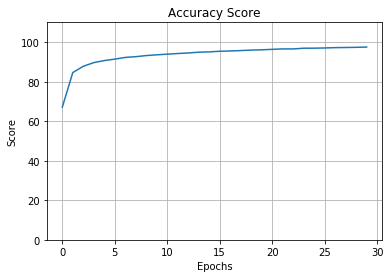

In [27]:
# Plot
plt.grid()
plt.plot(EA)
plt.title("Accuracy Score")
plt.ylim(0.00,110)
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.savefig("epochs.png",dpi = 300)

In the end, although the out-of-sample accuracy is relatively high, by selecting a better set of hyperparameters (number of epochs, batch size, number of neurons in the various layers, number of layers, etc..) we could obtain even better results.